In [64]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(glue)

In [109]:
output <- read.table("/Users/shayecarver/condPCA/computation_memory_comparison/output.txt", header = TRUE, sep = " ")
output$name = factor(paste(output$cells, output$method, output$package, sep = "_" ) )
output$name = paste(output$method, output$package, sep = "_" ) 
output$labels <- paste(output$cells, output$genes, sep = "_")
output$labels <- factor(output$labels, levels=unique(output[order(output$cells, output$genes), ]$labels))
output$dashed_lines = ifelse(output$method == "conditional", "Dashed", "Solid")


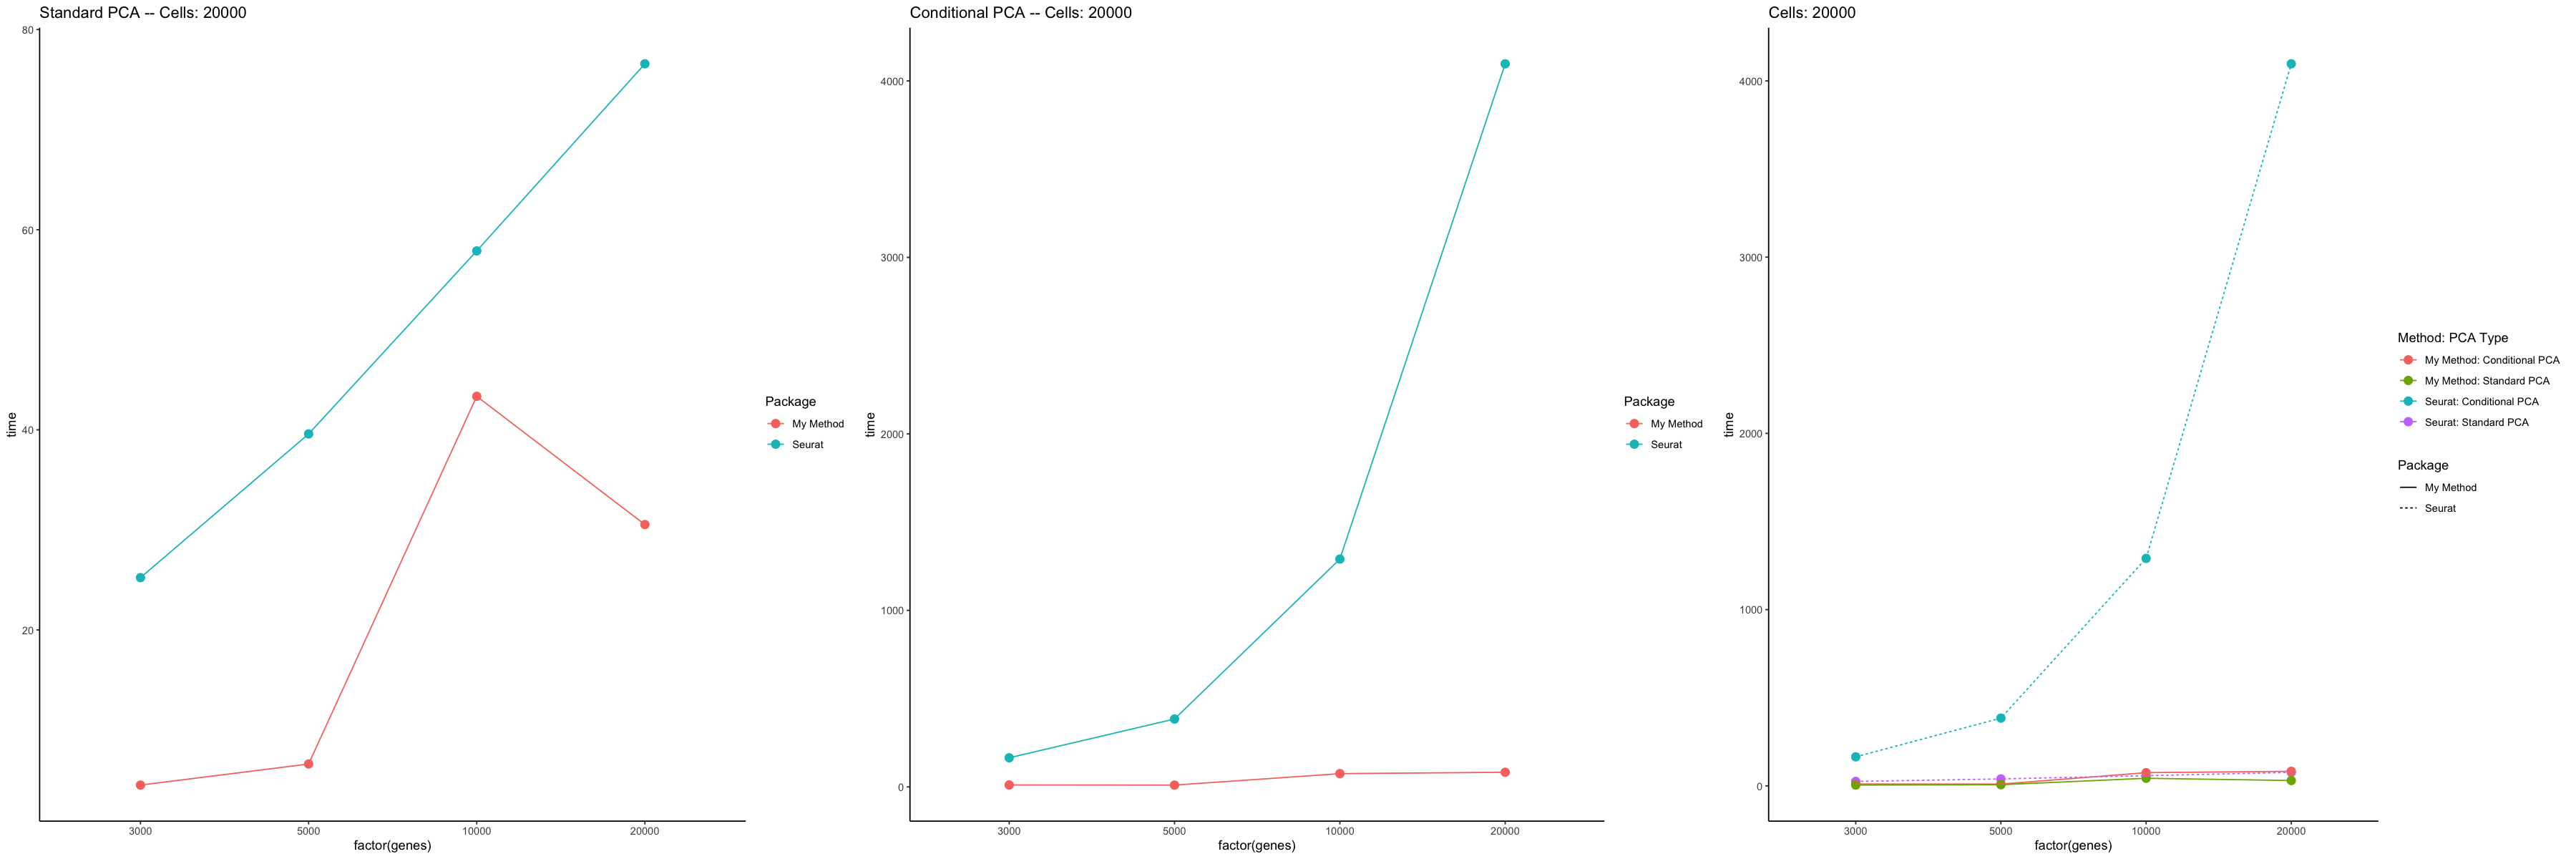

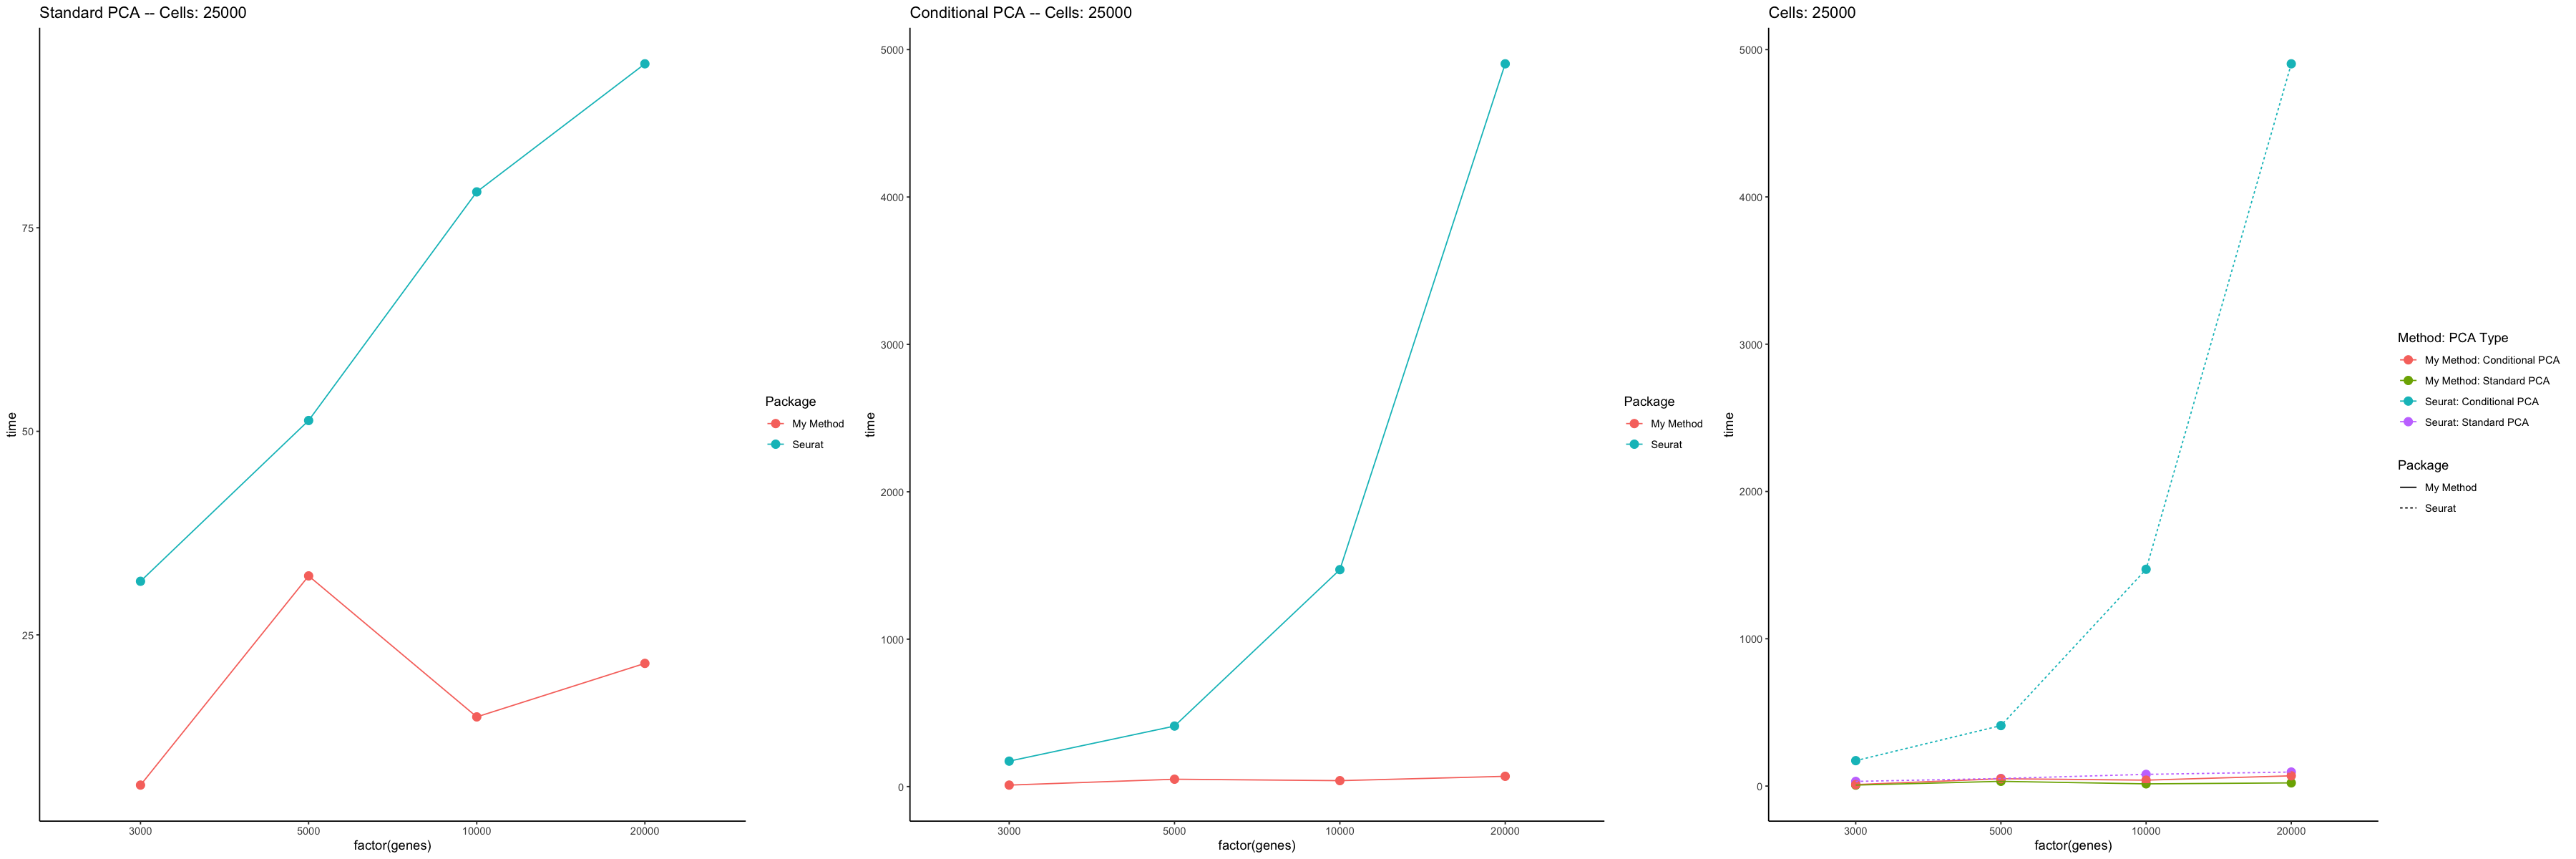

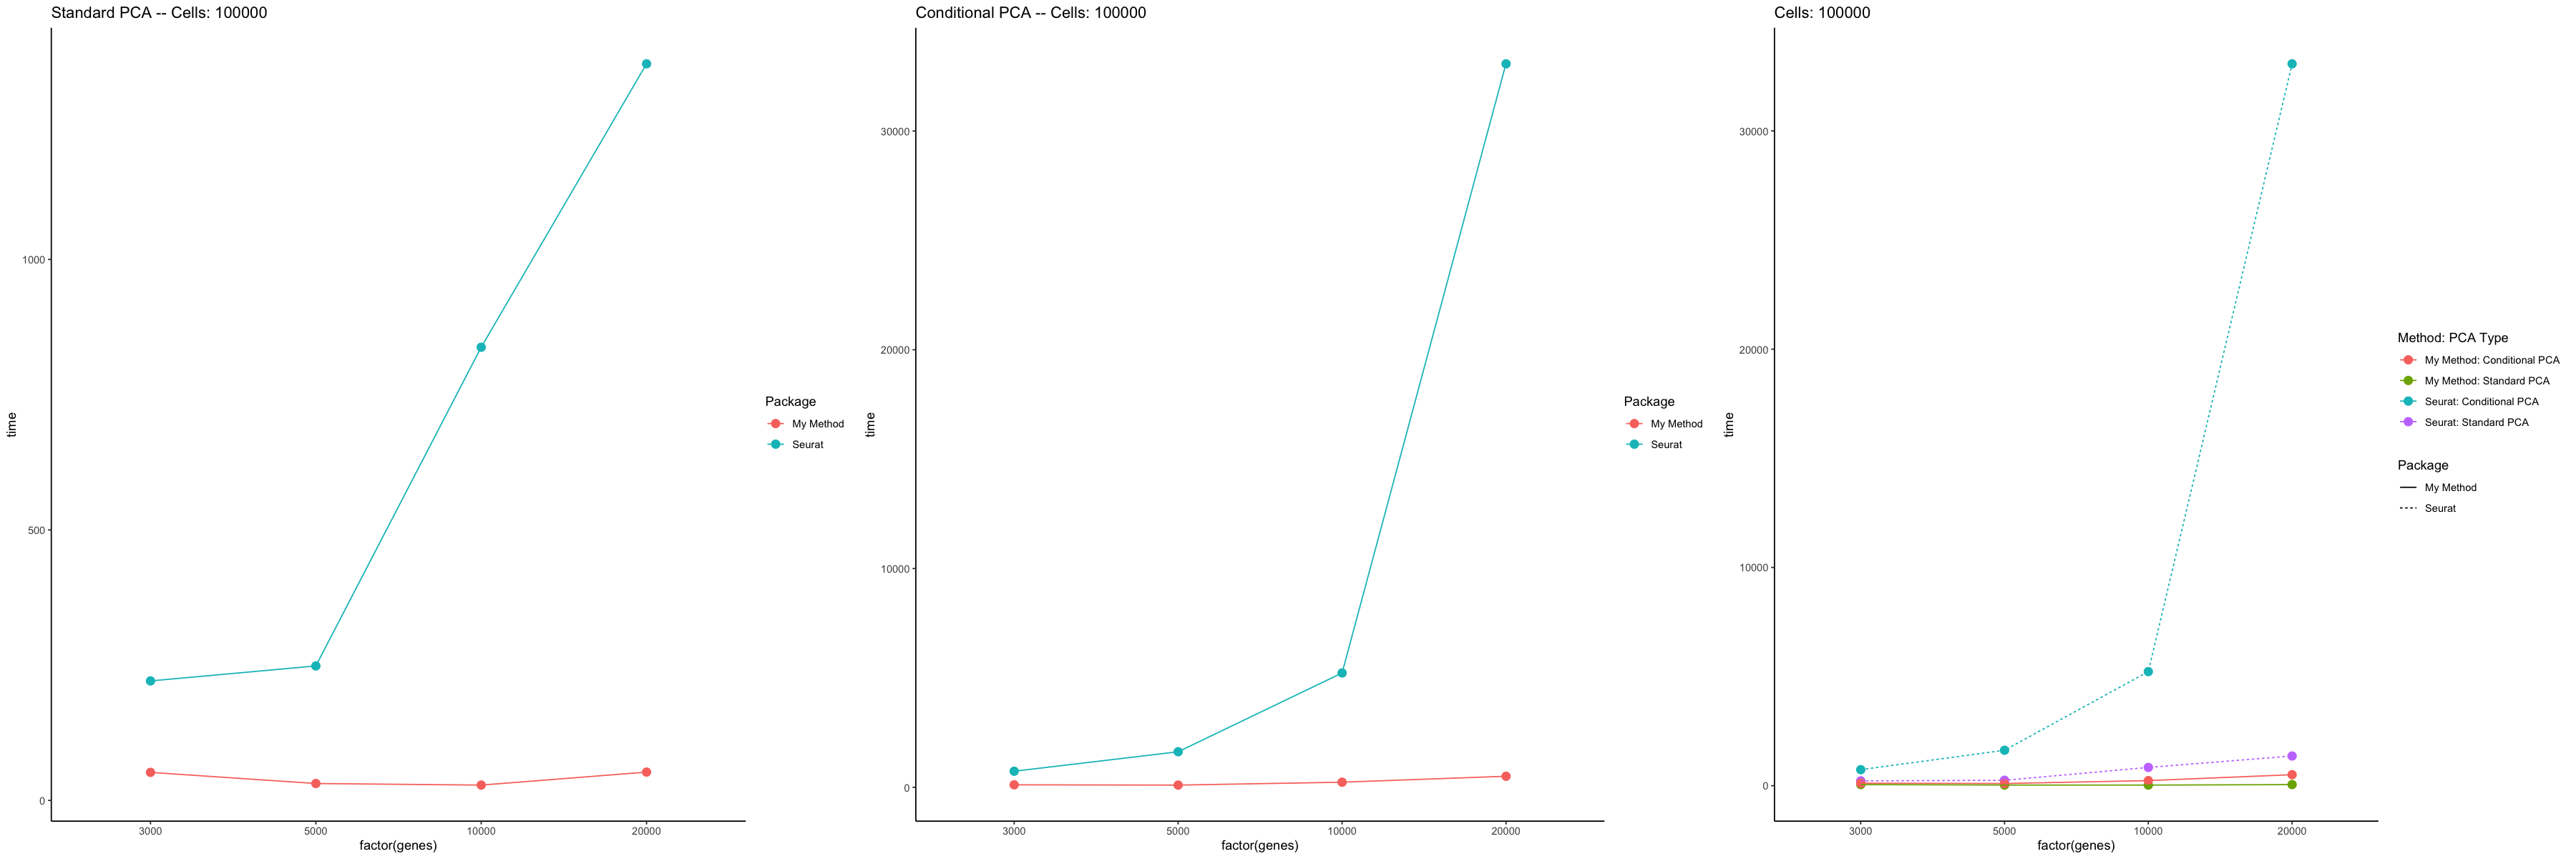

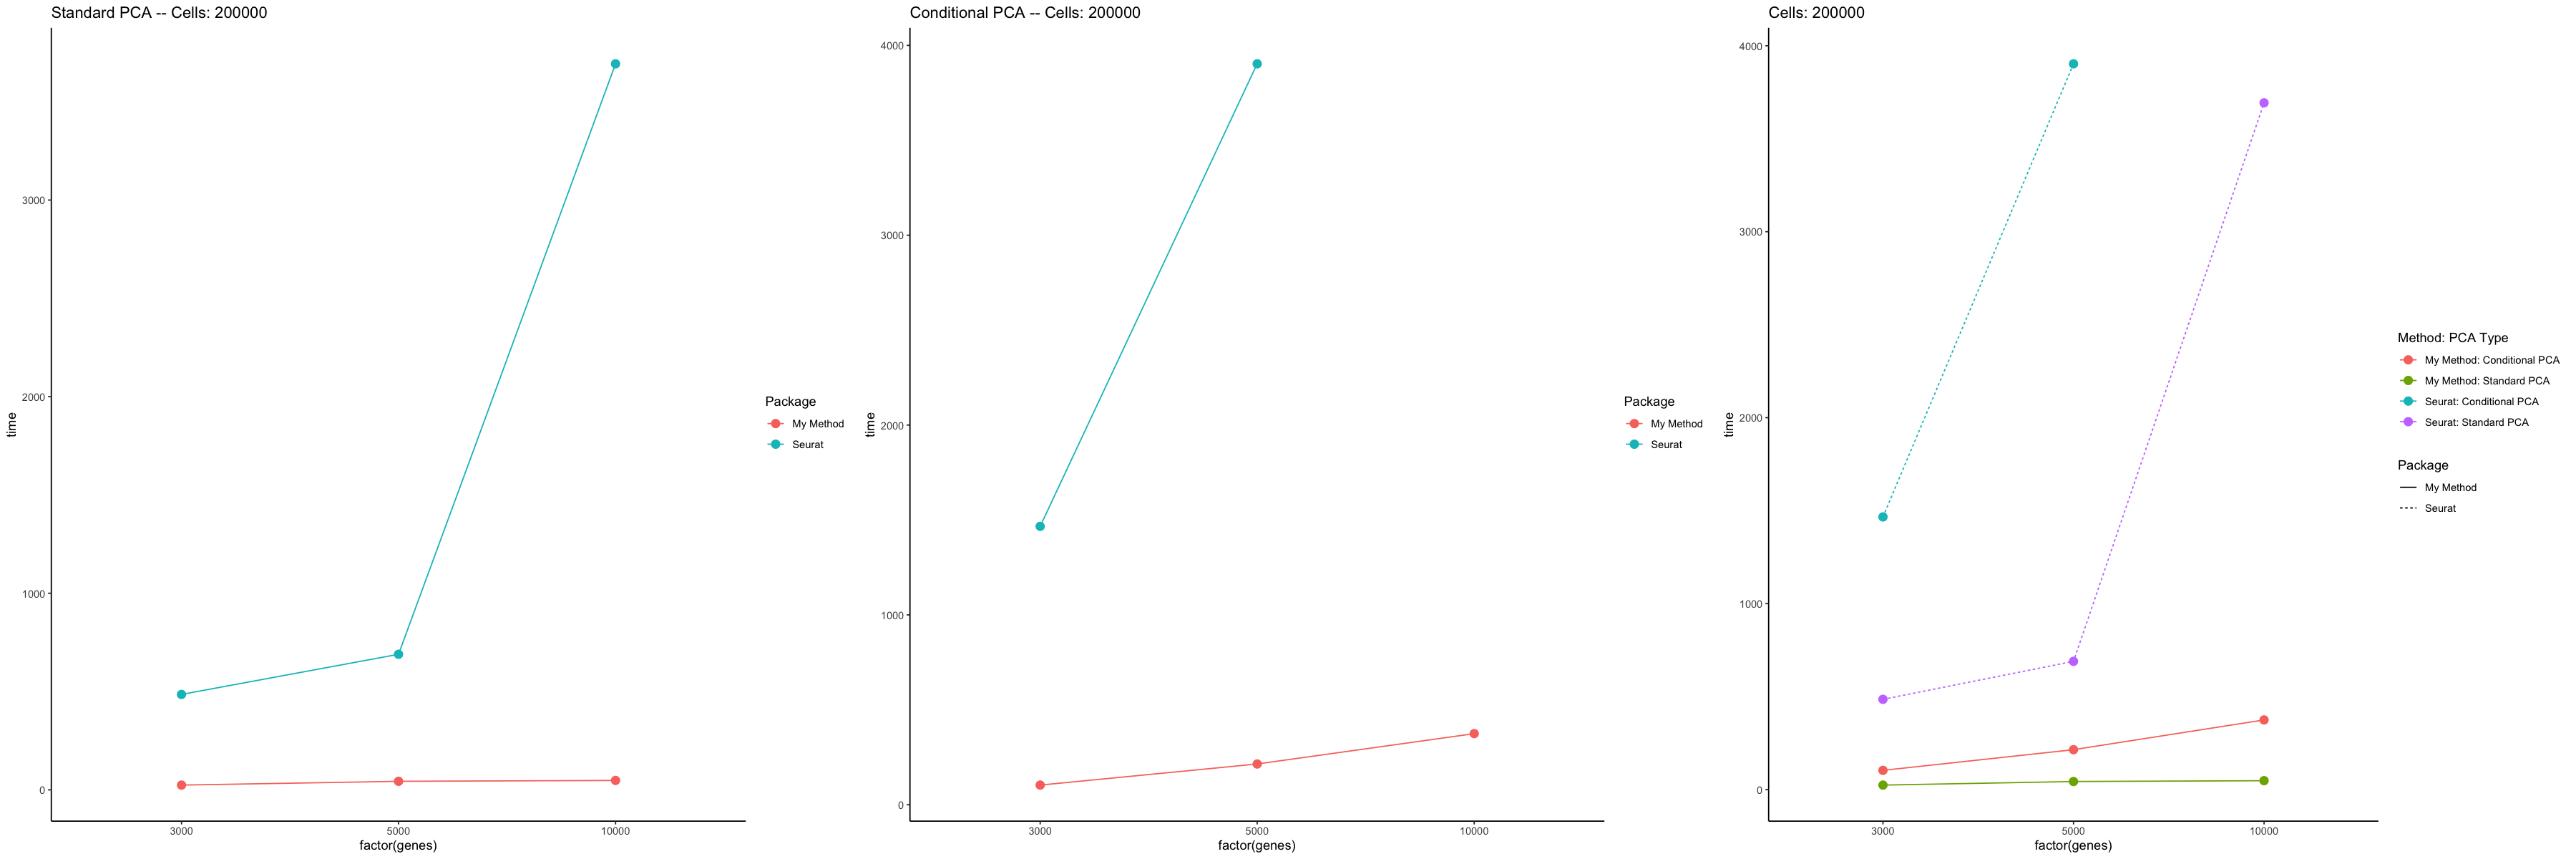

In [110]:
options(repr.plot.width = 30, repr.plot.height = 10)
output[output$package == "my_method",]$package = "My Method"
output[output$name == "conditional_Seurat",]$name = "Seurat: Conditional PCA"
output[output$name == "standard_Seurat",]$name = "Seurat: Standard PCA"
output[output$name == "standard_my_method",]$name = "My Method: Standard PCA"
output[output$name == "conditional_my_method",]$name = "My Method: Conditional PCA"

for (cells in unique(output$cells) ){

    tmp = output[output$cells == cells & output$method == "conditional" ,]
    plot2 = ggplot(tmp, aes(x = factor(genes), y = time, group = name, colour = package)) +
                geom_point(size = 3)+
                geom_line()+
                ggtitle(glue("Conditional PCA -- Cells: {cells}"))+
                theme_classic()+
                labs(color = "Package")

    tmp = output[output$cells == cells & output$method == "standard" ,]
    plot1= ggplot(tmp, aes(x = factor(genes), y = time, group = name, colour = package)) +
                geom_point(size = 3)+
                geom_line()+
                ggtitle(glue("Standard PCA -- Cells: {cells}"))+
                theme_classic()+
                labs(color = "Package")


    tmp = output[output$cells == cells  ,]
    plot3 = ggplot(tmp, aes(x = factor(genes), y = time, group = name, colour = name, linetype=package)) +
                geom_point(size = 3)+
                geom_line()+
                ggtitle(glue("Cells: {cells}"))+
                theme_classic()+
                labs(color = "Method: PCA Type",linetype="Package")

    grid.arrange(plot1, plot2, plot3, ncol = 3)

}
